In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px
import plotly.graph_objects as go

In [2]:
os.chdir('E:\csv files')
data=pd.read_csv('data2.csv')


In [3]:
data.head()

,A,B
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


In [4]:
data.shape

(1111, 2)

In [6]:
data.describe()

,A,B
count,1111.000000,1111.000000
mean,6.783026,-26.187358
std,79.383668,69.794973
min,-134.962839,-132.422167
25%,-53.521987,-77.000000
50%,15.737782,-46.072638
75%,76.134647,7.435231
max,134.605775,134.425495


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       1111 non-null   float64
 1   B       1111 non-null   float64
dtypes: float64(2)
memory usage: 17.5 KB


In [8]:
data.isnull().sum()

A    0
B    0
dtype: int64

In [9]:
data.corr()

,A,B
A,1.000000,0.455804
B,0.455804,1.000000


<AxesSubplot:>

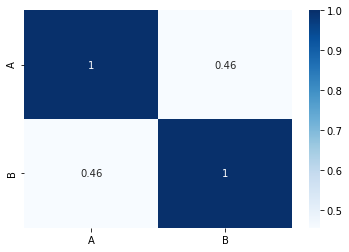

In [10]:
import seaborn as sns
sns.heatmap(data.corr(),annot=True,cmap="Blues")

In [11]:
y=data[['B']]

In [12]:
y

,B
0,-130.572085
1,-129.938929
2,-130.141832
3,-125.760932
4,-112.785214
...,...
1106,121.000000
1107,123.609122
1108,127.197394
1109,128.170885


In [13]:
x=data[['A']]

In [14]:
x

,A
0,-122.740667
1,-121.531419
2,-134.917019
3,-120.605951
4,-129.894781
...,...
1106,-115.366669
1107,-119.954237
1108,-109.942155
1109,-111.515368


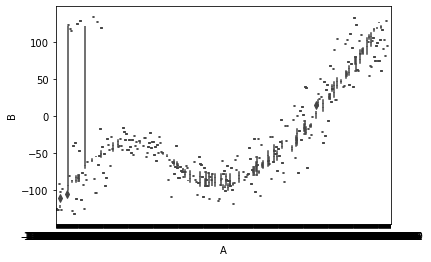

In [15]:
sns.boxplot(y="B", x="A", data= data)
plt.show()

In [16]:
x = x[['A']]
y = y

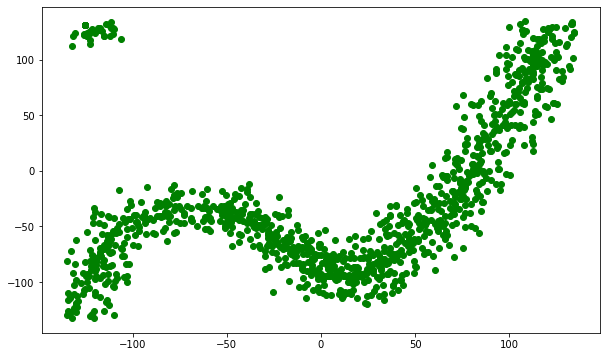

In [17]:
plt.figure(figsize=(10,6))
plt.scatter(x,y, marker='o', color='g')

In [18]:
xg=x.values.reshape(-1,1)
yg=y.values.reshape(-1,1)
xg=np.concatenate((np.ones(len(x)).reshape(-1,1),x),axis=1)

In [19]:
xg

array([[   1.       , -122.7406674],
       [   1.       , -121.5314194],
       [   1.       , -134.917019 ],
       ...,
       [   1.       , -109.9421548],
       [   1.       , -111.5153684],
       [   1.       , -110.3442214]])

In [20]:
yg

array([[-130.5720846],
       [-129.9389289],
       [-130.1418321],
       ...,
       [ 127.1973936],
       [ 128.1708846],
       [ 123.0879499]])

In [21]:
def computeCost(x,y,Theta):
    m=len(y)
    h_x=x.dot(Theta)
    j=np.sum(np.square(h_x-y))*(1/(2*m))
    return j

In [22]:
def gradientDescent(x, y, theta, alpha, iteration):
    print('Running Gradient Descent...')
    j_hist = []
    m = len(y)
    for i in range(iteration):
        j_hist.append(computeCost(x, y, theta))
        h_x = x.dot(theta)
        theta = theta - ((alpha/m) *((np.dot(x.T, (h_x-y) ))))
        #theta[0] = theta[0] - ((alpha/m) *(np.sum((h_x-y))))
    return theta, j_hist

In [23]:
theta = np.zeros((2,1))
iteration = 2000
alpha = 0.001

theta, cost = gradientDescent(xg, yg, theta, alpha, iteration)
print('Theta found by Gradient Descent: slope = {} and intercept {}'.format(theta[1], theta[0]))

Running Gradient Descent...
Theta found by Gradient Descent: slope = [nan] and intercept [nan]


C:\Users\DELL\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-21-d4d0d5c87c31>:4: RuntimeWarning: overflow encountered in square
  j=np.sum(np.square(h_x-y))*(1/(2*m))
<ipython-input-22-e81683f4f12d>:8: RuntimeWarning: invalid value encountered in subtract
  theta = theta - ((alpha/m) *((np.dot(x.T, (h_x-y) ))))


In [24]:
theta.shape

(2, 1)

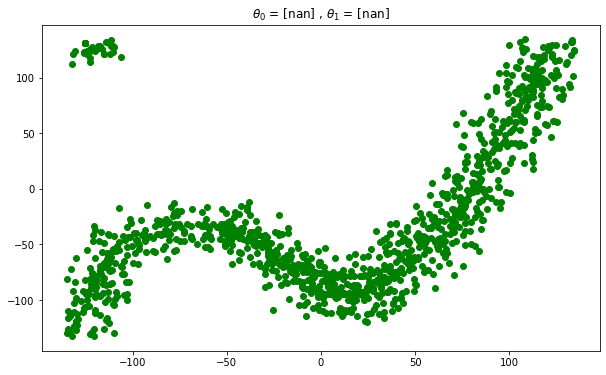

In [25]:
plt.figure(figsize=(10,6))
plt.title('$\\theta_0$ = {} , $\\theta_1$ = {}'.format(theta[0], theta[1]))
plt.scatter(x,y, marker='o', color='g')
plt.plot(x,np.dot(x.values, theta.T))
plt.show()

In [26]:
from scipy import stats

xs = x.iloc[:,0]
ys = y.iloc[:,0]
#xs = np.concatenate((np.ones(len(x)).reshape(-1,1), x), axis=1)

slope, intercept, r_value, p_value, std_err = stats.linregress(xs, ys)

In [27]:
print('Slope = {} and Intercept = {}'.format(slope, intercept))
print('y = x({}) + {}'.format(slope, intercept))

Slope = 0.4007474824252679 and Intercept = -28.905638679971496
y = x(0.4007474824252679) + -28.905638679971496


In [28]:
xsm = x.values.reshape(-1,1)
ysm = y.values.reshape(-1,1)
xsm = np.concatenate((np.ones(len(x)).reshape(-1,1), xsm), axis=1)

import statsmodels.api as sm

results = sm.OLS(ysm, xsm).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     290.8
Date:                Sat, 18 Jun 2022   Prob (F-statistic):           4.33e-58
Time:                        15:21:11   Log-Likelihood:                -6163.4
No. Observations:                1111   AIC:                         1.233e+04
Df Residuals:                    1109   BIC:                         1.234e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -28.9056      1.871    -15.446      0.000     -32.578     -25.234
x1             0.4007      0.023     17.054      0.000       0.355       0.447
==============================================================================
Omnibus:                      235.194   Durbin-Watson:                   0.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              458.829
Skew:                           1.235   Prob(JB):                    2.33e-100
Kurtosis:                       4.951   Cond. No.                         79.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""